## Contents
- Dataset loading
- Model building
    - Simple Linear
    - Convolutional
    - Complex
- Model Output / Analysis

## About
We will walk through the simplest possible DNN model training implimentations.

## Dataset
The MNIST dataset is one of the most popular image datasets to work with. Each dataset has its one format / file structure, so do not be suprised if trying other dataset involves some fine tuning.

You can use [Kaggle](https://www.kaggle.com/c/digit-recognizer/data) for downloading the data. Note that the training csv is the only file you can realistically train on, since the test set does not have labels.

You can also go to the original dataset [here](http://yann.lecun.com/exdb/mnist/). Below, we will be using this dataset, however Kaggle is probably one of the greatest ways to get started in machine learning due to the ease of dataset finding and downloading.

When you unzip it, you will find these:
![imagetxt](../../res/mnist_files.png)

Kind of weird. It's just some kind of ubyte file. Commonly most datasets have a csv format which is certainly easier. So lets do just that and make these csvs!

In `pytorch_tensorflow_image_ml/utils` we have a file called `mnist_conversion.py`. This is a file created by others for handling this dataset. Not sure why the authors didn't just make the dataset as a csv, however I think the ubyte format makes it as small as possible, as well as allowing you to convert the entire dataset into any file format you would want. The folder should look like this:
![imagetxt](../../res/mnist_with_converter.png)

`cd` into the folder and call `python mnist_conversion.py` and we should get:
![imagetxt](../../res/mnist_converter_result.png)

Awesome! We have the csvs! But wait... Where are the images? First we need to structure the project a little. Typically our projects involve some structure like so:
![imagetxt](../../res/project_data_structure_view.png)

Some important notes, normally the data folder is in the the highest / 2nd higher directory so that any of the submodules can use it. Also, if you are using version control, having all the data in a single directory makes gitignoring it a lot easier. *Trying to push a large number of images / data into a VCS is, and has been, extremely messy.*

Ok.

We have th csvs, lets see what is in them!

In [211]:
from pytorch_tensorflow_image_ml.utils.file_handling import get_absolute_path
absolute_path_to_mnist = get_absolute_path('mnist')
print(absolute_path_to_mnist)

"""
This is what the absolute path to the mnist directory looks like. You can either:
A. Manually make a full string to your mnist dir
B. Use relative pathing to the data dir ex: ../../data/mnist
C. Use my absolute pathing method (the best way obviously.)
"""

/Users/jlaivins/PycharmProjects/PyTorchTensorflowImageML/pytorch_tensorflow_image_ml/data/mnist


'\nThis is what the absolute path to the mnist directory looks like. You can either:\nA. Manually make a full string to your mnist dir\nB. Use relative pathing to the data dir ex: ../../data/mnist\nC. Use my absolute pathing method (the best way obviously.)\n'

I have some comments about pathing. Typically if you are just using a single computer, and a single user (you) **relative paths** are the easiest way. But if you try to deploy on a server, and it happens (for whatever reason) to get confused by the relative paths, then maybe use the server's **absolute paths**. *But what if you are using VCS? What if there are other users? Maybe you are working on a team? Maybe this needs to be deployed on different servers?* Then some automated way of getting the abolute path would be a good route. Also, keep in mind that different OS's handle paths differently, so using an automated path getter that can be robust to different OS's could be advantageous. If you want to make your own, go for it! I would use `import os` for pathing.

We have the path to the folder now. Remember that the test set is not what we are going to train on, will show both. We are going to use the `pandas` library. This (in my opinion) is one of the most powerful libraries for doing anything with spreadsheet based data, and is one of the reasons python as a language has become so popular with the data science community (on top of the hundreds of other amazing python libraries).

In [212]:
import pandas as pd
import os
# The os.path.joint is better than using 'some_path' + '/' + 'filename' because it will determine the separator '/' 
# as needing to either be '/' or '\'. This is a safer approach to combining paths.
df = pd.read_csv(os.path.join(absolute_path_to_mnist, 'mnist_train.csv'), nrows=5)
print(df)

   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


Awesome! Kind of. Not really. What the hell is this? Pandas primary data structure is called a *DataFrame*. This is basically a csv with functions. We have loaded basically a csv with 5 rows. There has to be a better way to digure out what is in this.

I do not usually use Jupyter notebooks for a lot of my actual programs. I usually use [Pycharm](https://www.jetbrains.com/pycharm/), and if you run the above code in debug mode:
![imagetxt](../../res/pycharm_eval_step_1.png)

The big thing is the **Evaluation** button in the bottom middle (looks like a calculator)

![imagetxt](../../res/pycharm_eval_step_2.png)
![imagetxt](../../res/pycharm_eval_step_3.png)

If you click *View as DataFrame* then the right side bar will have the DataFrame's contents for display! Keep in mind that you want to keep the DataFrame small because PyCharm starts having issues if the DataFrame is too large (takes a lot of memory). Hence above, we only read in 5 rows.

![imagetxt](../../res/pycharm_eval_step_4.png)

But notice that only the first column has non-zero values. This is important and you will see why!

In [213]:
print(df.columns)
print(f'There are {len(df.columns)} columns')

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)
There are 785 columns


Ok so there is one columns labeled as **5** and the other columns increase in value from 0 to 0.617. 
This is super weird. 
Basically, the **5** column is where the **labels** are. So, what are the other columns for?
The other columns? They are the literal pixels :o. Let's unpack this. Let do row 3 (as we discovered above.). 
Column '5' contains the labels, so the image at row 3 is an image of a number 9 apparently.

**Our goal will be to have a model look at the image and predict that the image is a 9**
Immediately, we are already interested in the values that we will be feeding. Column *5* will be our **y** and the other columns will be our **x** 

In [214]:
row_3 = df.loc[3]
print(row_3)
# So we have the row output. Notice that the first column (5) has a value of '9' which is our label. 
# Lets separent them.
our_label = row_3[0]
our_flat_image = row_3[1:]

5        9
0        0
0.1      0
0.2      0
0.3      0
0.4      0
0.5      0
0.6      0
0.7      0
0.8      0
0.9      0
0.10     0
0.11     0
0.12     0
0.13     0
0.14     0
0.15     0
0.16     0
0.17     0
0.18     0
0.19     0
0.20     0
0.21     0
0.22     0
0.23     0
0.24     0
0.25     0
0.26     0
0.27     0
0.28     0
        ..
0.588    0
0.589    0
0.590    0
0.591    0
0.592    0
0.593    0
0.594    0
0.595    0
0.596    0
0.597    0
0.598    0
0.599    0
0.600    0
0.601    0
0.602    0
0.603    0
0.604    0
0.605    0
0.606    0
0.607    0
0.608    0
0.609    0
0.610    0
0.611    0
0.612    0
0.613    0
0.614    0
0.615    0
0.616    0
0.617    0
Name: 3, Length: 785, dtype: int64


Now, we have reached a fork in the road. Are we doing a **continuous** problem or a **classification** problem?

A **continuous problem** tries to predict continuous values such as predict tomorrow's tempurature, next week's stock price, the desired motor accelaration, the required steering angle. All of these are numbers that can range from a nice 0 &rarr; 1 (normalized values) such as probabilities, to -30 &rarr; 110 if tempuratures, to -180 &rarr; 180 for steering angles. 

A **classification problem** tries to predict categorical values such as predict is this a dog/cat/horse, is this a rock/pedestrian/road/stop sign, will this person buy this product (yes / no), is this yeast cell dead/alive. There can be 2 classes (yes / no), all the way up to 1000 classes (ImageNet).

What are we trying to do? We are using numbers, so maybe this is continuous? **But wait**. We are trying to predict if an image is a 1, 2, 3, ... 9. There are a gauranteed 10 different numbers to predict! If this was a continuous problem, we would be trying to predict if an image is a 1, 1.1, 1.2, 1.3, 1.31... Like how tempurature might have many many numbers. Are we trying to do this? **No!** We are only trying to predict 10 numbers... **10 classes**. So this is a classification problem. 

So 1 sample of `y` should not be `(1, 1)` but `(1, 10 classes)`. And a set of `y` such as 5 samples should not be `(5, 1)` but `(5, 10 classes)`!

### Important explaination: Normalization (OneHot)
**Neural networks like _normalized_ data. Which means the data needs to be between 0 &rarr; 1.**
No matter what, you will likely almost always do this / want to do this to your data. Both for your `x` and your `y`!

In [215]:
import numpy as np
# For a classification problem, we want to OneHot the `y`. So remember our `row_3` label?
print(f' {our_label} is our label. So we have this. ')
# To Onehot this, we make an empty version of the label
number_of_classes = 10
onehot_label = np.zeros((1, number_of_classes))  # For a shape (1, 10) 1 row, 10 features / columns
print(f' {onehot_label} ok... So where did the 9 go? ')
onehot_label[0, our_label] = 1  # Put the 1 at the place where the label is 
print(f' {onehot_label} Awesome we still have no idea where 9 is... there\'s just a 1...')
onehotted_label = np.argmax(onehot_label[0])  # max returns the value, argmax returns the location
print(f' {onehotted_label} Oh... So onehot turns any class name into a range of 0 to 1')
print(' We do this by adding as many zeros as there are classes, and putting a 1 at the index representing the label')
print(' Then, np.argmax will return the index of the max value.')
print(' Bascially... we hide the label as an index so that we can normalize the classes. We get it back via argmax!')
print(' Our y is now normalized. If we were predicting numbers 0 to 999, we just change number_of_classes to 1000')
normalized_image = our_flat_image / 255  # This is typically all you have to do to normalize images.

 9 is our label. So we have this. 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ok... So where did the 9 go? 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] Awesome we still have no idea where 9 is... there's just a 1...
 9 Oh... So onehot turns any class name into a range of 0 to 1
 We do this by adding as many zeros as there are classes, and putting a 1 at the index representing the label
 Then, np.argmax will return the index of the max value.
 Bascially... we hide the label as an index so that we can normalize the classes. We get it back via argmax!
 Our y is now normalized. If we were predicting numbers 0 to 999, we just change number_of_classes to 1000


Above was kind of crazy. Just to help understanding normalizing data. If you wanted to predict the classes for dog and cat, then you might have a `y` like:

In [216]:
y = ['dog', 'cat', 'horse', 'cat', 'person', 'dog']

Oh my god, `y` is a STRING?!?! How would we turn **these into numbers????**. This is common in image classification if we are getting our classes as strings from a file system. Easy, we just give these a code:

In [217]:
class_keys = {'dog':0, 'cat':1, 'horse':2, 'person':3}
numeric_y = []
for element in y:
    numeric_y.append(class_keys[element])
print(f' {numeric_y} We have turned them into numbers! Just make sure that you remmember the original class_keys!')
print(' All we would have to do is fix there shapes (right now they are as 1 row, should be 6 rows).')
print(' then OneHot them to normalize their values')

 [0, 1, 2, 1, 3, 0] We have turned them into numbers! Just make sure that you remmember the original class_keys!
 All we would have to do is fix there shapes (right now they are as 1 row, should be 6 rows).
 then OneHot them to normalize their values


 The row shape (785,)
 The flat image shape (784,)
 The reshaped image shape (28, 28)


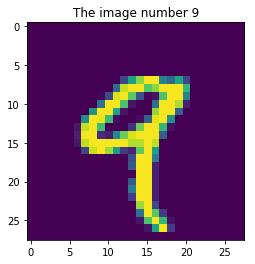

In [218]:
# So we separated the row into `our_label` and `our_flat_image`. Think of these are our `y` and our `x`
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
plt.title(f'The image number {onehotted_label}')
numpy_array = np.array(normalized_image)
plt.imshow(numpy_array.reshape(28, 28))
our_flat_image = np.array(numpy_array)
print(f' The row shape {row_3.shape}')
print(f' The flat image shape {numpy_array.shape}')
print(f' The reshaped image shape {numpy_array.reshape(28, 28).shape}')

Cool! 

So we have a better understanding of the data we were working with. So to review what we have done:
- We read **5** rows from a training csv using a very powerful csv library `pandas`
- A single row has a shape of (785, )
- The **y** label is in the first column index **0**. Removing it makes the row shape (784, )
- As referenced in [MNIST](http://yann.lecun.com/exdb/mnist/) They say the image shape is *"the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field"*. The images are 28x28, and the remaining row has a **shape 784**, which means that you can sqrt(784) and get 28. This means we can **cleanly** reshape it into a 28x28 2d matrix.

We have also made use of the `numpy` library! This is a library that uses Python / C bindings for extremely fast matrix calculations. This allows use to use the simplicity of Python with the power or C. In fact, you could create a decent neural net from scratch using only numpy. **Numpy like pandas, is a massive go-to library for data science / expensive math operations**


#### Major Things to Realize
A single image when turned into a numpy array is of shape (784, ). **This is a not row**. Neither is (785, )! You might get major dimension errors if you do not consider this. (784, ) currently is treated as "785 rows". In reality, we want it to be in the shape (1, 784) meaning "1 row of 784 **features / columns**". You might be a lot of issues if you do not understand this. and is resolved by doing:


In [251]:
print(f' {numpy_array.shape} says "784 rows". Doesn\'t make sense, this is one row. Also known as a 1d matrix.')

print(f'\n The examples below you would think are 1d matrices because there is only 1 row, but that would be wrong. ')
print(f' {numpy_array.reshape(1, -1).shape} says "1 row, 784 features / columns". Better, \'1\' means 1 row, \'-1\' means dump everything else.')
print(f' {np.expand_dims(numpy_array, 0).shape} says same as above. We basically shove an extra dimension at index \'0\'')
print(f' {numpy_array[np.newaxis, :].shape} says the same also. We add a new axis to the start.')

 (784,) says "784 rows". Doesn't make sense, this is one row. Also known as a 1d matrix.

 The examples below you would think are 1d matrices because there is only 1 row, but that would be wrong. 
 (1, 784) says "1 row, 784 features / columns". Better, '1' means 1 row, '-1' means dump everything else.
 (1, 784) says same as above. We basically shove an extra dimension at index '0'
 (1, 784) says the same also. We add a new axis to the start.


## Dataset Continuation
We have said a lot, but lets more formally set up our *x* and *y*.

In [252]:
# Lets do this again but get super cerial this time.
df = pd.read_csv(os.path.join(absolute_path_to_mnist, 'mnist_train.csv'), nrows=5)

y = df['5'].values # Get the column '5', get the numpy array.
print(f' {y}')
# Get all the other columns (5 is in index 0, so we ignore it doing [1:] instead of just [:])
remaining_columns = df.columns[1:] 
x = df[remaining_columns].values # Get just the numpy array
print(f' Our x shape {x.shape}')
print(f' Our y shape {y.shape}')
y = y.reshape(-1, 1)
print(f' Fixed y shape {y.shape}')

 [0 4 1 9 2]
 Our x shape (5, 784)
 Our y shape (5,)
 Fixed y shape (5, 1)


Ok final thing, If we were prediction a **continuous** value, then y only needs to have 1 feature.  Meaning that the final output is some continous values. **It is typically faster to train by doing a classification problem as opposed to a continuous problem.** The continuous problem is something like "what is the temperature going to be tomorrow", and classification problem is "is this image a cat or a dog?". *What are we trying to do?* We are trying to predict "is this image a cat or a dog", or "is this image a 0, a 1, a 2 ...". We absolutely could turn this into a continuous problem, but why would we? We have 10 known classes, so lets have a model that can do classification. So the y values will be converted into a (N, 10) shape.

In [253]:
class_y = np.zeros((y.shape[0], 10))
print(f' {class_y.shape} is our new y samples. Each row is a sample, and there are 10 classes.')
print(f' {y.shape} currently has 5 samples, but 1 value. this is "ok" will be weirder to think about.\n')
print(f' {class_y} \n\n This is a new y. 5 samples by 10 classes :)\n\n')
class_y[np.arange(y.shape[0]), y[:, 0]] = 1
print(f' {class_y} \n\n Now we have a revised y with 10 classes. The \'1\' is the "correct" class. \n\n')
print(f' We can get the original y values easily doing {np.argmax(class_y, axis=1)}')
print(' Experiment with the axis part. In numpy the axis param provides different ways a function can be done on some matrix')

 (5, 10) is our new y samples. Each row is a sample, and there are 10 classes.
 (5, 1) currently has 5 samples, but 1 value. this is "ok" will be weirder to think about.

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

 This is a new y. 5 samples by 10 classes :)


 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 

 Now we have a revised y with 10 classes. The '1' is the "correct" class. 


 We can get the original y values easily doing [0 4 1 9 2]
 Experiment with the axis part. In numpy the axis param provides different ways a function can be done on some matrix


In [254]:
# Y is normalized, lets do X (nothing changes, just as easy)
y = class_y.copy()
x = x / 255
print(f' Y final shape: {y.shape} X final shape: {x.shape}. Looking good!')

 Y final shape: (5, 10) X final shape: (5, 784). Looking good!


## Model Building
Ok so as seen above, we have a pipeline of stripping data from a csv and making sure it is the correct shape.

A safe data format is typically:

*x.shape &rarr; (N Samples, F Features)*

*y.shape &rarr; (N Samples, K Classes)*


So as shown in the previous section, we got 5 rows from the csv. So:

`N = 5`

How many labels are we trying to predict? We are trying to predict whether an image is a 0, 1, 2, ... 9. In other words, there are 10 classes, 10 labels that we are trying t predict. So:

`K = 10`

How many features are we using to make this prediction? **All of the image pixels**. We are using all of the image pixels to predict a label. Kind of a "duh" thing to say. We are doing image classification, so you would think this is an obvious thing to say. The images are 28x28, so have a total of 784 pixels. So:

`F = 784`

So:

x.shape is (5, 784)

y.shape is (5, 10)

In [255]:
import torch 
# Ref: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_nn.html
model = torch.nn.Sequential(
    torch.nn.Linear(x.shape[1], 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, y.shape[1]),
)

Boom! We have our neural net. Super easy with using the pytorch library (torch). It is great that we organized our samples above. This means that we want a model that does:

x &rarr; &rarr; Linear Layer &rarr; Activation Function &rarr; Linear Layer &rarr; pred_y

But what do we do with `y`? We will:
1. Use `y` to show our model how *wrong* it is so it can improve, and... 
2. To get our model's accuracy. I mean, we want to know how good our model is right??

We are using Linear Layers in this example. They are (in my opinion) the simplest elements in a neural net both in frameworks like this, and in custom from-scratch neural nets. 

**Linear Layer Qualities**

Some Pros:
- Simple
- Each neuron in a layer connects to all the neurons in the next layer, thus can represent some pretty complex features

Some (Big) Cons:
- Each neuron in a layer connects to all the neurons in the next layer... This means they will be extremely slow to learn, and scale badly for large data samples. What if we feed it images 500x500? MNIST is only 28x28. Conceptually simple linear model can jump to gigabytes of weights / parameters if too many linear connections are being used. Also, some images have a lot of *useless* space such as a sky. We want our neural net to leverage common big features. For example, if we want to recognize faces we might be interested in eyes, mouths, ears. Lineary layers will put *equal importance* on every pixel..

This is why it is normally common to have a single linear layer at the end of a complex model with other layers. However, MNIST images are small, so we can get away will using Linear Layers here.

**Activation Functions**

There are many activation functions. These decide when a single neuron "fires". Here are a few:
- ReLU
- LeakyReLU
- Tanh
- Sigmoid
- Softmax

There are many more [Activation Functions](https://en.wikipedia.org/wiki/Activation_function).

**Neural Net Description**

We are using the pytorch `Sequential Module` for structuring our Neural Net. We certainly do not have to use it to make the same type of model, but this is much simpler. A simple and common neural net involves one layer passing its activations to next layer then the next then the next till it gets to the last layer.

## ADD A FIGURE HERE SHOWING THE NEURAL NET STACK

Remember that `x.shape` is `(N, 784)` and so `x.shape[1]` is 784. So `Linear(x.shape[1], 64)` says we want to feed in samples with 784 features, and output 64 activations. **Now why did we choose 64?** Well... just because? Hidden layer sizes are usually chosen based on how well certain sizes affect the model accuracy / training time. The only times that hidden layer sizes matter typically is when using more complex layers such as convolutional neural nets. 

Our Neural Net is pretty simple, so after `Linear(x.shape[1], 64)` and the activation, we get to our output layer `Linear(64, y.shape[1])`. So `Linear(x.shape[1], 64)` and `Linear(64, y.shape[1])` need to be connected, the the first's output needs to be the same as the next's input. `Linear(64, y.shape[1])` is our output layer, so its output is the number of features of `y` which is the number of classes we are predicting. 

In [260]:
# This is our loss function. This will decide how wrong the model's predictions are. To be more technical, 
# it is how much the gradients are changing. If the gradients flatten out, 
# it is not / does not need to learn anymore.
loss_fn = torch.nn.MSELoss(reduction='sum')
epochs = 500
learning_rate = 1e-4  # Same as 0.0001

with torch.no_grad():
    y_tensor = torch.tensor(y).float()
    x_tensor = torch.tensor(x).float()

In [261]:
# Explainations are from https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_nn.html
for t in range(epochs):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x_tensor)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y_tensor)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 1.0412186668418144e-07
1 1.0372296088689836e-07
2 1.0338262512732399e-07
3 1.0303284625479137e-07
4 1.0275296347117546e-07
5 1.0244915671364652e-07
6 1.0212323786618072e-07
7 1.0180671239368166e-07
8 1.0149955187443993e-07
9 1.0121559057552076e-07
10 1.0087935464753173e-07
11 1.0060006871981386e-07
12 1.0030102970404187e-07
13 1.0000371020169041e-07
14 9.96996973867681e-08
15 9.938323586311526e-08
16 9.910692710946023e-08
17 9.881750173690307e-08
18 9.85003580922239e-08
19 9.821129509646198e-08
20 9.7922509212367e-08
21 9.761899377735972e-08
22 9.732066530432348e-08
23 9.70598676985901e-08
24 9.6773682400908e-08
25 9.645419396520083e-08
26 9.617249219218138e-08
27 9.594199923412816e-08
28 9.564404024331452e-08
29 9.535248324255008e-08
30 9.505891540584344e-08
31 9.480516638404879e-08
32 9.450099014429725e-08
33 9.423175129086303e-08
34 9.393045985461868e-08
35 9.367266784465755e-08
36 9.340305240357338e-08
37 9.311903426123536e-08
38 9.284967461553606e-08
39 9.258587141403041e-08
40 

459 2.890044825676341e-08
460 2.883751548665714e-08
461 2.875395743728859e-08
462 2.8681416353038003e-08
463 2.8616256031455123e-08
464 2.8545748875785648e-08
465 2.846778812681805e-08
466 2.8393587925279462e-08
467 2.8312639344107993e-08
468 2.8241229799164103e-08
469 2.8166402543661206e-08
470 2.8086198256005446e-08
471 2.8024496501188878e-08
472 2.7951386982749682e-08
473 2.7884267339572943e-08
474 2.779184349321895e-08
475 2.7725443274562167e-08
476 2.7665002733101574e-08
477 2.7590663975729512e-08
478 2.7515243417042257e-08
479 2.745386140645678e-08
480 2.7380432143786493e-08
481 2.7308715289109387e-08
482 2.7248033163118635e-08
483 2.7172657013352364e-08
484 2.7096303867324423e-08
485 2.7028409732565706e-08
486 2.6959570575968428e-08
487 2.6886805670756075e-08
488 2.682400612741276e-08
489 2.6756163507002384e-08
490 2.6677692943621878e-08
491 2.6606379321947315e-08
492 2.6537220421118946e-08
493 2.6466750568943098e-08
494 2.6413781384349022e-08
495 2.6344187276095e-08
496 2.62727